### Pobieranie danych

In [1]:
import os
import pandas as pd
import urllib.request
from seaborn import load_dataset

In [2]:

all_of_data = load_dataset('penguins')

all_of_data.head(100)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
95,Adelie,Dream,40.8,18.9,208.0,4300.0,Male
96,Adelie,Dream,38.1,18.6,190.0,3700.0,Female
97,Adelie,Dream,40.3,18.5,196.0,4350.0,Male
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female


### Czyszczenie danych z rekordow NAN

In [3]:
nan_df = all_of_data[all_of_data.isna().any(axis=1)]

nan_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN


In [4]:
all_of_data = all_of_data.dropna()
all_of_data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


### Rozdzielenie danych na dwa zbiory X,Y

In [5]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [6]:

X = np.asarray(all_of_data['flipper_length_mm'].apply(lambda x: x/1000), dtype='float64')
Y = np.asarray(all_of_data['body_mass_g'].apply(lambda x: x/1000), dtype='float64')

Przydatne infromacje:
- intercept_ -> podaje wspolczynnik przy x0 
- coef_ -> podaje liste wspolczynnikow przy [x1,x2,x3]

## Model liniowy bez podzialu na dane testowe i treningowe

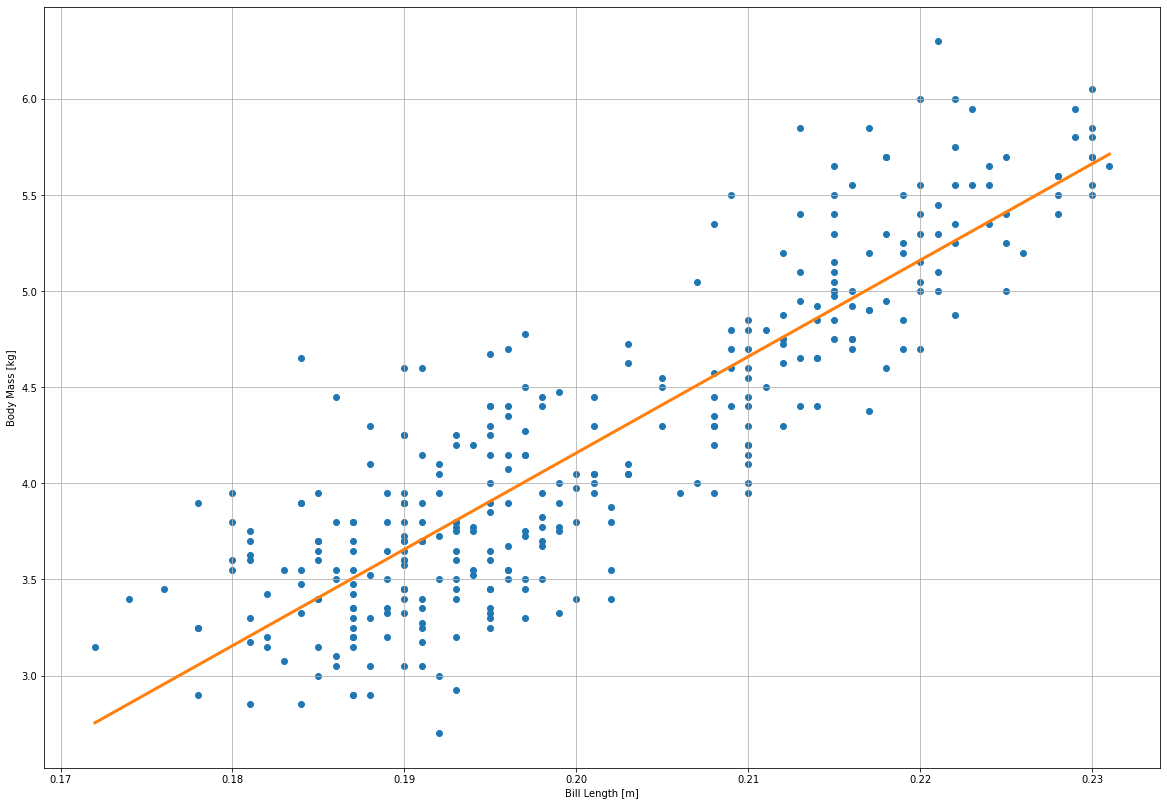

In [7]:
model_lin = LinearRegression()
model_lin.fit(X.reshape(-1,1), Y)
X_test = np.linspace(start=X.min(), stop=X.max(), num=300)
Y_pred = model_lin.predict(X_test.reshape(-1,1))

plt.figure(figsize=(20,14))
plt.scatter(X,Y)
plt.plot(X_test, Y_pred, color='tab:orange', linewidth=3)
plt.xlabel('Bill Length [m]')
plt.ylabel('Body Mass [kg]')

plt.grid()
plt.show()

### Parametr a w modelu liniowym

In [8]:
a=str(np.round(model_lin.coef_,5)[0])
print("a="+a)

a=50.15327


### Parametr b w modelu liniowym

In [9]:
b=str(np.round(model_lin.intercept_,5))
print("b="+ b)

b=-5.87209


### Postac ogolna modelu liniowego bez podzialu na dane testowe i treningowe

In [10]:
print(f'y={a}x+({b})')

y=50.15327x+(-5.87209)


### Wskaznik jakosci modelu liniowego bez podzialu na dane testowe i treningowe

In [11]:

MSE_LIN_WITHOUT_TEST = np.round(mean_squared_error(Y, model_lin.predict(X.reshape(-1,1))),4)

print("Blad srednio-kwadratowy="+str(MSE_LIN_WITHOUT_TEST) )

Blad srednio-kwadratowy=0.1538


# Model liniowy i kwadratowy z podzialem na dane testowe i treningowe 20/80
- testowe=20% 
- treningowe 80%

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,train_size=0.8)

In [13]:
model_lin = LinearRegression()
model_lin.fit(X_train.reshape(-1,1), 
              Y_train)

a=np.round(model_lin.coef_,5)[0]
b=np.round(model_lin.intercept_,5)

print(f'Parametry modelu liniowego: a={a}, b={b}')
MSE_LIN_TEST = np.round(mean_squared_error(Y_test, model_lin.predict(X_test.reshape(-1,1))),4)

print(f'Błąd średniokwadratowy modelu liniowego: {MSE_LIN_TEST}')

Parametry modelu liniowego: a=50.02689, b=-5.85391
Błąd średniokwadratowy modelu liniowego: 0.1563


### Postac ogolna modelu liniowego z podzialem na dane testowe i treningowe

In [14]:
print(f'y={a}x+{b}')

y=50.02689x+-5.85391


### Uogolniony model liniowy-wielomianowy (uogólniony liniowy) stopnia 2

In [15]:
from sklearn.preprocessing import PolynomialFeatures

model_GLM = LinearRegression()

gen_features = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

model_GLM.fit(gen_features.fit_transform(X_train.reshape(-1,1)), Y_train)
a = np.round(model_GLM.coef_[2],4)
b = np.round(model_GLM.coef_[1],4)
c = np.round(model_GLM.intercept_,4)


print(f'Parametry modelu GLM: a={a},b={b},c={c}')
MSE_GLM_TEST = np.round(mean_squared_error(Y_test, model_GLM.predict(gen_features.fit_transform(X_test.reshape(-1,1)))),4)
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM_TEST}')

Parametry modelu GLM: a=515.7708,b=-160.078,c=15.4409
Błąd średniokwadratowy modelu GLM: 0.139


### Postac ogolna modelu kwadratowego (uogolnionego liniowego)

In [16]:
print(f'y=({a})x^2 + ({b})x + ({c})')

y=(515.7708)x^2 + (-160.078)x + (15.4409)


### Predykcje modeli 
* liniowa bez podzialu na testowe i treningowe
* liniowa z podzialem na testowe i treningowe
* kwadratowa z podzialem na testowe i treningowe

In [17]:
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)

y_lin_pred = model_lin.predict(os_x.reshape(-1,1))
y_GLM_pred = model_GLM.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

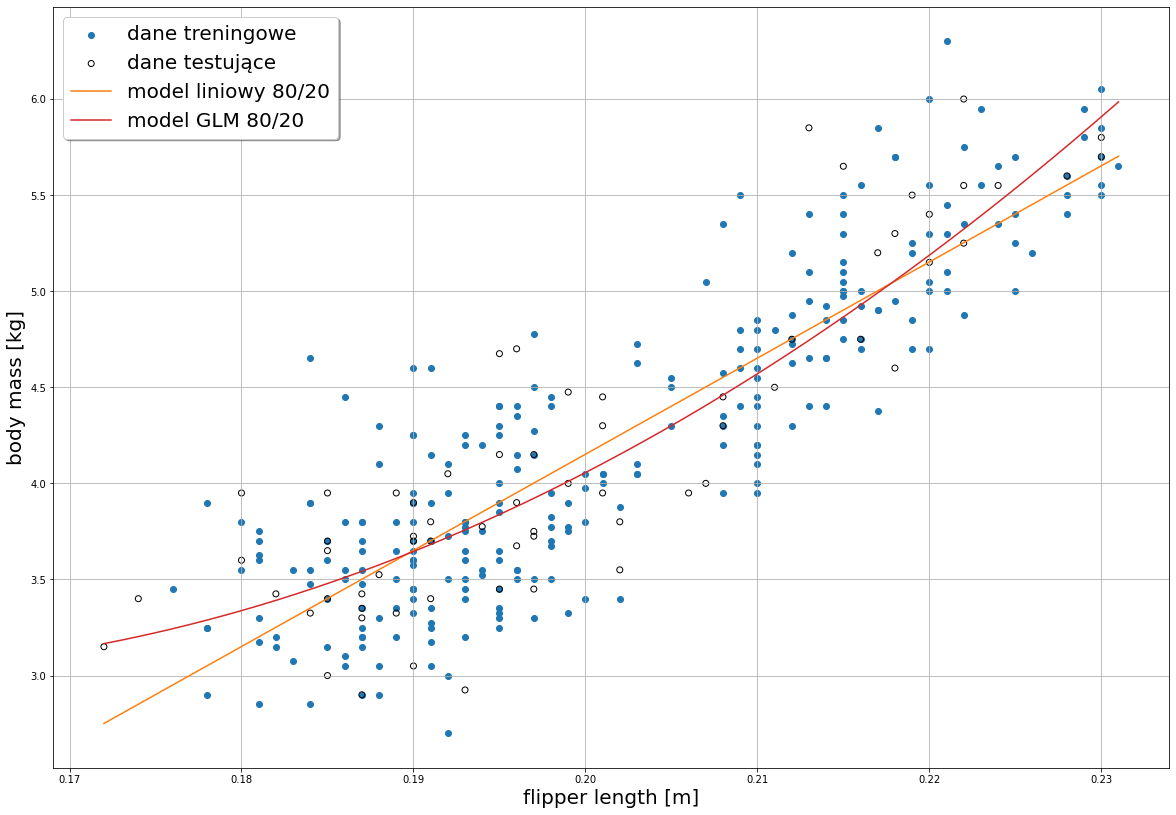

In [18]:
plt.figure(figsize=(20,14))
plt.scatter(X_train, Y_train, label='dane treningowe')
plt.scatter(X_test, Y_test, edgecolor='black', facecolor='none', label='dane testujące')

plt.plot(os_x, y_lin_pred, label='model liniowy 80/20', color='tab:orange')
plt.plot(os_x, y_GLM_pred, label='model GLM 80/20', color='tab:red')

plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xlabel(xlabel='flipper length [m]',fontsize=20)
plt.ylabel(ylabel='body mass [kg]',fontsize=20)

plt.grid()
plt.show()

### Porownanie bledow sredniokwadratowych modeli

In [19]:
print(f"Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: {MSE_LIN_WITHOUT_TEST}")
print(f"Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: {MSE_LIN_TEST}")
print(f"Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: {MSE_GLM_TEST}")

Blad sredniokwadratowy funkcji liniowej bez podzialu na dane testowe i treningowe: 0.1538
Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: 0.1563
Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: 0.139


# Model liniowy i kwadratowy z podzialem na dane testowe i treningowe 50/50
- testowe 50%
- treningowe 50%

In [20]:
X_train_H, X_test_H, Y_train_H, Y_test_H = train_test_split(X, Y,test_size=0.5,train_size=0.5)

### Funkcja liniowa

In [21]:
model_lin_H = LinearRegression()
model_lin_H.fit(X_train_H.reshape(-1,1), Y_train_H)

a=np.round(model_lin.coef_,5)[0]
b=np.round(model_lin.intercept_,5)

print(f'Parametry modelu liniowego: a={a}, b={b}')
MSE_LIN_TEST_H = np.round(mean_squared_error(Y_test_H, model_lin_H.predict(X_test_H.reshape(-1,1))),4)

print(f'Błąd średniokwadratowy modelu liniowego: {MSE_LIN_TEST_H}')

Parametry modelu liniowego: a=50.02689, b=-5.85391
Błąd średniokwadratowy modelu liniowego: 0.1515


### Funkcja kwadratowa

In [22]:
model_GLM_H = LinearRegression()

gen_features_H = PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

model_GLM_H.fit(gen_features.fit_transform(X_train.reshape(-1, 1)), Y_train)
a = np.round(model_GLM.coef_[2], 4)
b = np.round(model_GLM.coef_[1], 4)
c = np.round(model_GLM.intercept_, 4)

print(f'Parametry modelu GLM: a={a},b={b},c={c}')
MSE_GLM_TEST_H = np.round(mean_squared_error(Y_test_H, model_GLM_H.predict(gen_features_H.fit_transform(X_test_H.reshape(-1, 1)))), 4)
print(f'Błąd średniokwadratowy modelu GLM: {MSE_GLM_TEST_H}')

Parametry modelu GLM: a=515.7708,b=-160.078,c=15.4409
Błąd średniokwadratowy modelu GLM: 0.1393


### Predykcje modeli

In [23]:
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)

y_lin_pred_H = model_lin_H.predict(os_x.reshape(-1,1))
y_GLM_pred_H = model_GLM_H.predict(gen_features.fit_transform(os_x.reshape(-1,1)))

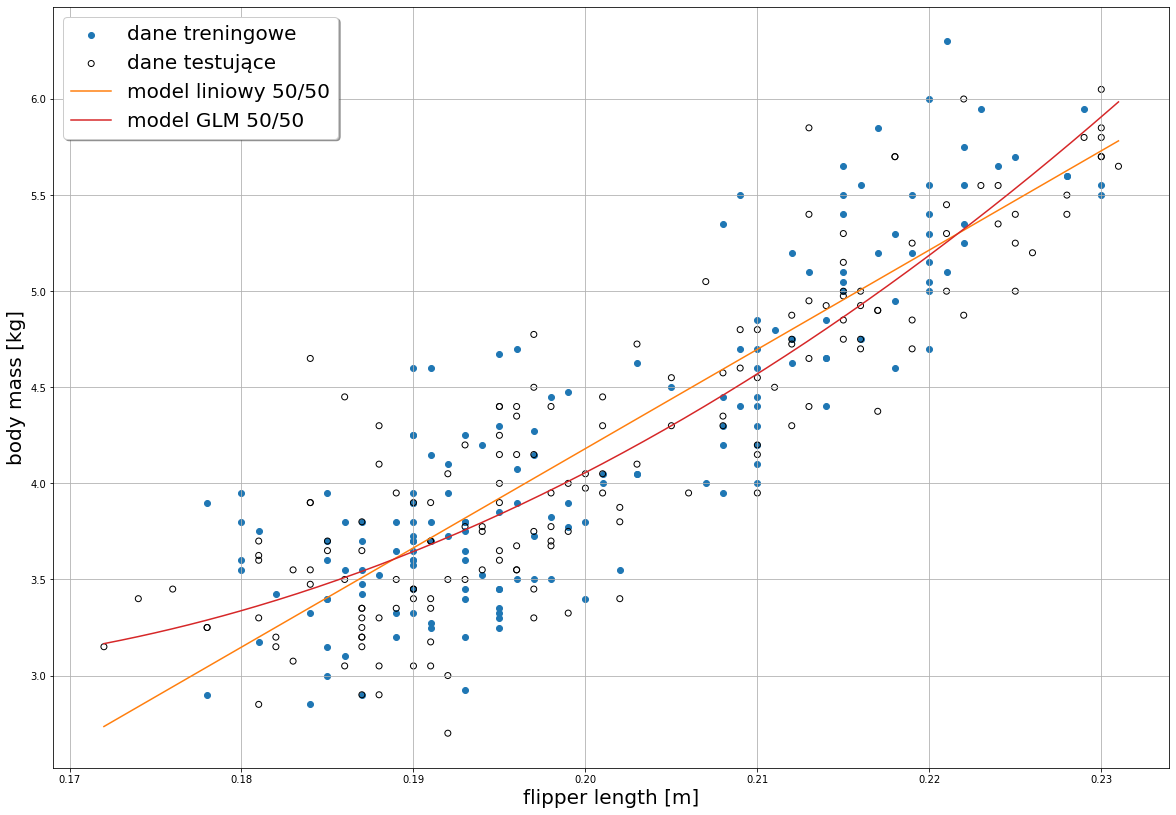

In [24]:
plt.figure(figsize=(20,14))
plt.scatter(X_train_H, Y_train_H, label='dane treningowe')
plt.scatter(X_test_H, Y_test_H, edgecolor='black', facecolor='none', label='dane testujące')

plt.plot(os_x, y_lin_pred_H, label='model liniowy 50/50', color='tab:orange')
plt.plot(os_x, y_GLM_pred_H, label='model GLM 50/50', color='tab:red')

plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xlabel(xlabel='flipper length [m]',fontsize=20)
plt.ylabel(ylabel='body mass [kg]',fontsize=20)

plt.grid()
plt.show()

In [25]:
print(f"Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: {MSE_LIN_TEST_H}")
print(f"Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: {MSE_GLM_TEST_H}")

Blad sredniokwadratowy funkcji liniowej z danymi testowymi i treningowymi: 0.1515
Blad sredniokwadratowy funkcji kwadratowej z danymi testowymi i treningowymi: 0.1393


# Zobrazowanie wszystkich modeli na jednym wykresie

### Funkcje liniowe

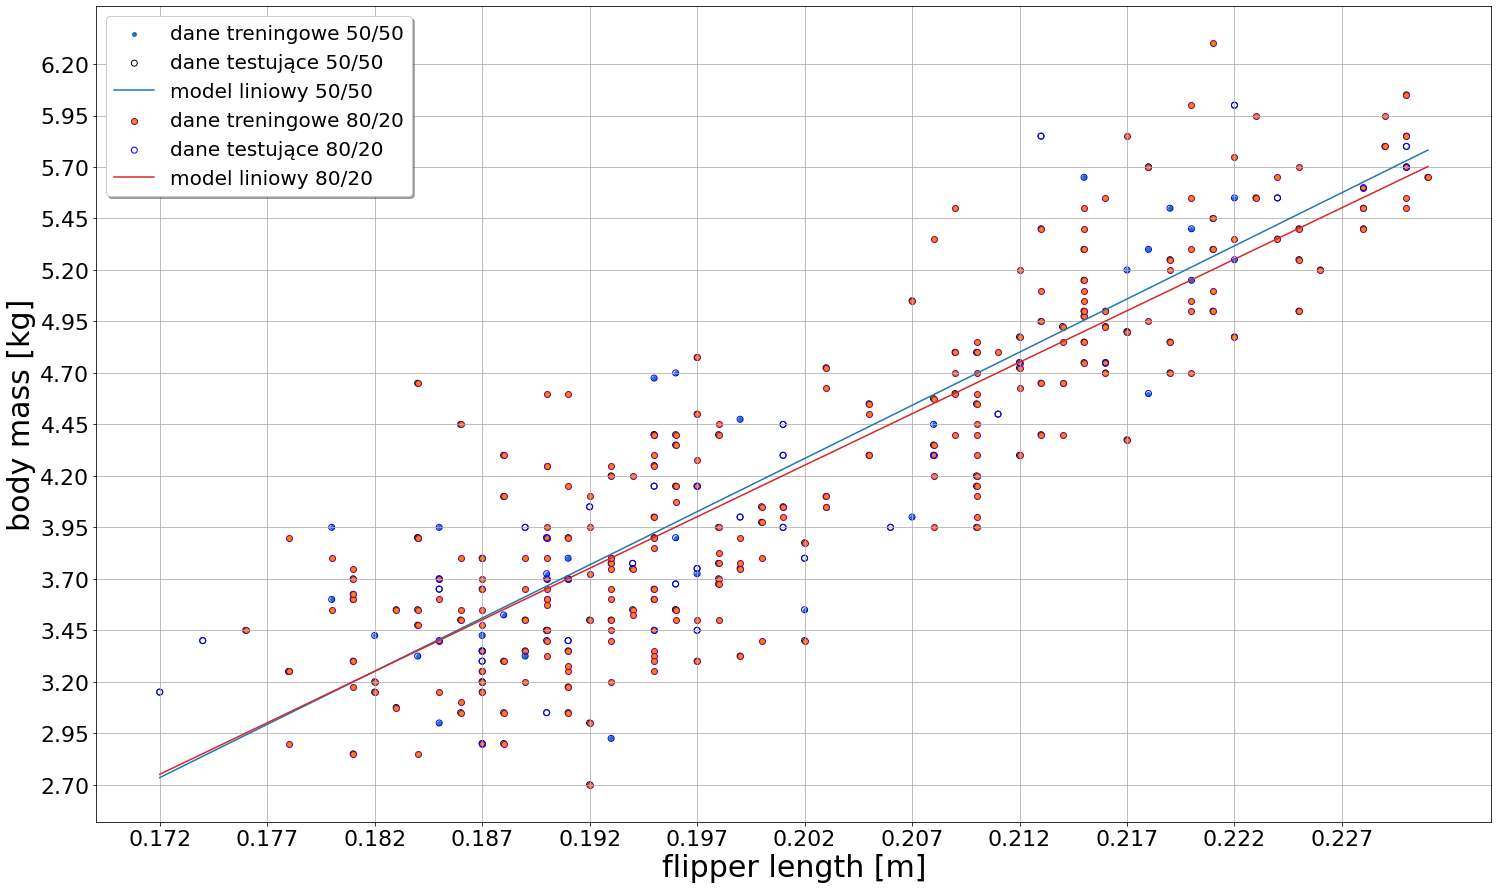

In [26]:
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
plt.figure(figsize=(25,15))

# 50/50
plt.scatter(X_train_H, Y_train_H,edgecolor='white', label='dane treningowe 50/50')
plt.scatter(X_test_H, Y_test_H, edgecolor='black', facecolor='none', label='dane testujące 50/50')
plt.plot(os_x, y_lin_pred_H, label='model liniowy 50/50', color='tab:blue')
# 80/20
plt.scatter(X_train, Y_train, edgecolor='purple',label='dane treningowe 80/20')
plt.scatter(X_test, Y_test, edgecolor='blue', facecolor='none', label='dane testujące 80/20')
plt.plot(os_x, y_lin_pred, label='model liniowy 80/20', color='tab:red')



plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xticks([x for x in np.arange(X.min(),X.max(),0.005)],fontsize=22)
plt.yticks([y for y in np.arange(Y.min(),Y.max(),0.25)],fontsize=22)

plt.xlabel(xlabel='flipper length [m]',fontsize=30)
plt.ylabel(ylabel='body mass [kg]',fontsize=30)

plt.grid()
plt.show()

### Funkcje kwadratowe

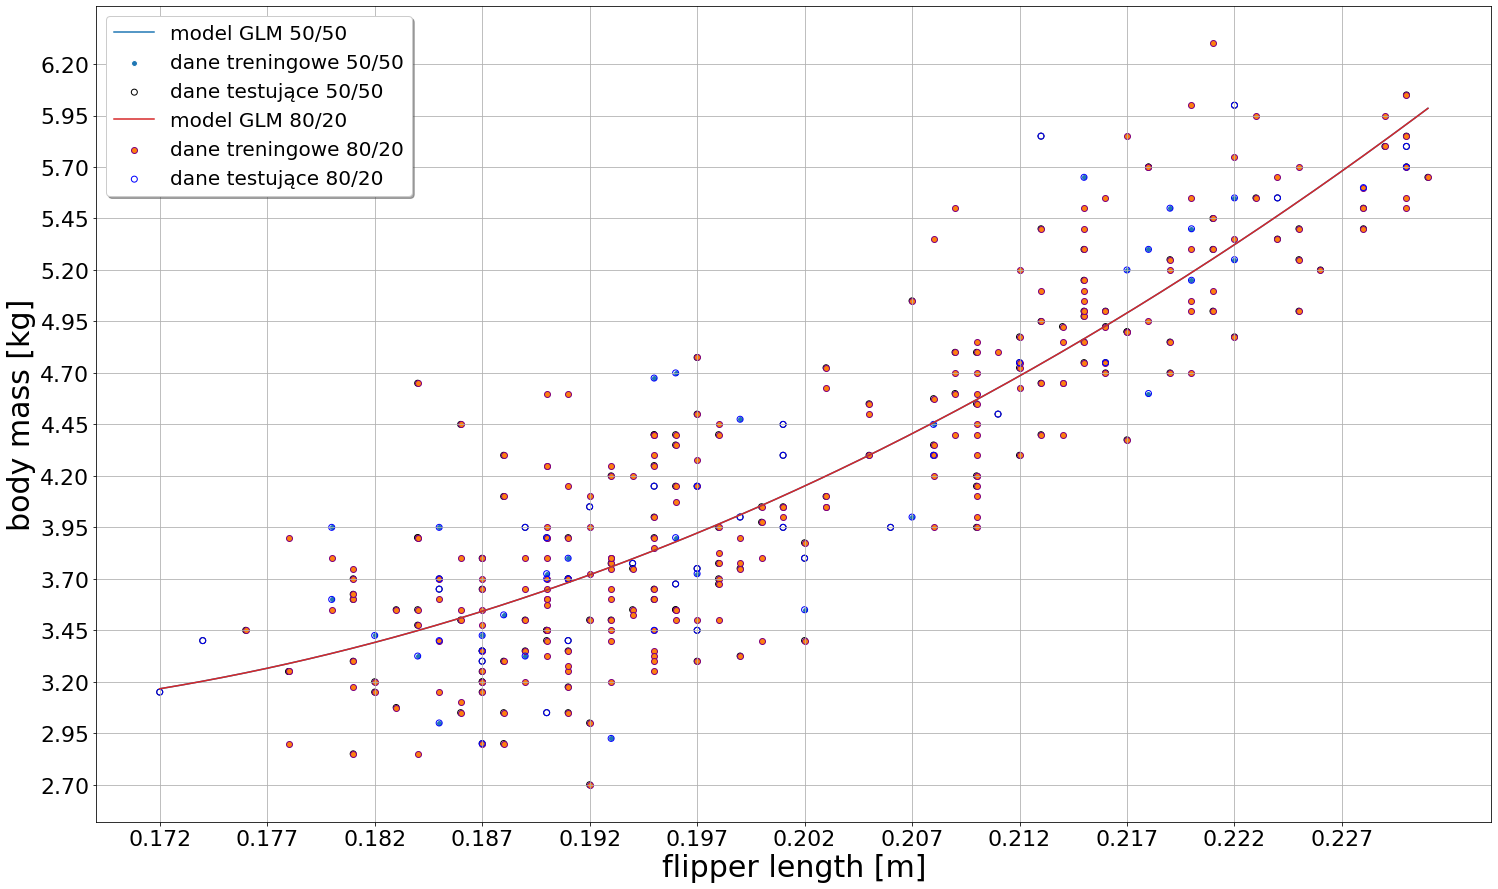

In [27]:
os_x = np.linspace(start=X.min(), stop=X.max(), num=300)
plt.figure(figsize=(25,15))

# 50/50
plt.plot(os_x, y_GLM_pred_H, label='model GLM 50/50', color='tab:blue')
plt.scatter(X_train_H, Y_train_H,edgecolor='white', label='dane treningowe 50/50')
plt.scatter(X_test_H, Y_test_H, edgecolor='black', facecolor='none', label='dane testujące 50/50')
# 80/20
plt.plot(os_x, y_GLM_pred, label='model GLM 80/20', color='tab:red')
plt.scatter(X_train, Y_train, edgecolor='purple',label='dane treningowe 80/20')
plt.scatter(X_test, Y_test, edgecolor='blue', facecolor='none', label='dane testujące 80/20')

plt.legend(fontsize=20, shadow=True, loc='upper left')

plt.xticks([x for x in np.arange(X.min(),X.max(),0.005)],fontsize=22)
plt.yticks([y for y in np.arange(Y.min(),Y.max(),0.25)],fontsize=22)

plt.xlabel(xlabel='flipper length [m]',fontsize=30)
plt.ylabel(ylabel='body mass [kg]',fontsize=30)

plt.grid()
plt.show()

### porownania bledow sredniokwadratowych

In [28]:
print(f"""
blad sredniokwadratowy funkcji liniowej bez podzialu = {MSE_LIN_WITHOUT_TEST}
            =====================
blad sredniokwadratowy funkcji liniowej z podzialem 80/20 = {MSE_LIN_TEST}
blad sredniokwadratowy funkcji kwadratowej z podzialem 80/20 = {MSE_GLM_TEST}    
            =====================                                                  
blad sredniokwadratowy funkcji liniowej z podzialem 50/50 = {MSE_LIN_TEST_H}
blad sredniokwadratowy funkcji kwadratowej z podzialem 50/50 = {MSE_GLM_TEST_H}
""")


blad sredniokwadratowy funkcji liniowej bez podzialu = 0.1538
blad sredniokwadratowy funkcji liniowej z podzialem 80/20 = 0.1563
blad sredniokwadratowy funkcji kwadratowej z podzialem 80/20 = 0.139    
blad sredniokwadratowy funkcji liniowej z podzialem 50/50 = 0.1515
blad sredniokwadratowy funkcji kwadratowej z podzialem 50/50 = 0.1393



# Rozklad wagi pingwinow

In [29]:
all_of_data['body_mass_kg'] = all_of_data['body_mass_g'].agg(lambda x: x/1000)
all_of_data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,body_mass_kg
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,3.750
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,3.800
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,3.250
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,3.450
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,3.650
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,4.925
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,4.850
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,5.750
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,5.200


### Zdefiniowanie zbiorów X

In [30]:
feature = 'body_mass_kg'
X = all_of_data[feature].values
X_male = X[all_of_data['sex']=='Male']
X_Female = X[all_of_data['sex']=='Female']

### Wstęp do testów
testy na normalność są nam potrzebne aby określić czy wyniki mają rozkład normalny. Hipotezy dla testów:
- H0: Nie mamy podstaw aby odrzucić, że nasz rozkład jest normalny.
- H1: Mamy podstawy by twierdzić, że nasz rozkład odbiega od krzywej Gaussa.
  
Poziom istotnosci statystycznej dla naszego przykładu możemy okreslic jako alfa=0,05
Wyniki naszych testów możemy zbadać pod kątem tej hipotezy.

### 1. Wykonać test Shapiro na "normalność" rozkładu. Wyznaczyć i zinterpretować p-wartość.

In [31]:
from scipy import stats

print(f'Cały zbiór           | test Shapiro, p-wartość = {stats.shapiro(X)[1]}')
print(f'Podzbiór kobiety     | test Shapiro, p-wartość = {stats.shapiro(X_Female)[1]}')
print(f'Podzbiór mezczyzni   | test Shapiro, p-wartość = {stats.shapiro(X_male)[1]}')

Cały zbiór           | test Shapiro, p-wartość = 3.5672570675160387e-08
Podzbiór kobiety     | test Shapiro, p-wartość = 6.155261189633165e-08
Podzbiór mezczyzni   | test Shapiro, p-wartość = 1.2268027660411462e-07


Jak widzimy, nasza p-wartość jest duuuuużo mniejsza niż nasza alfa co oznacza, że musimy odrzucić hipotezę H0 i przyjąć H1.
Mamy solidne podstawy aby twierdzić, że nasz rozkład nie jest rozkładem normalnym

### 2. Wykonać test d'Agostino na "normalność" rozkładu. Wyznaczyć i zinterpretować p-wartość.

In [32]:
print(f'Cały zbiór              | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X)[1]}\n')
print(f'Podzbior mezczyzni      | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X_male)[1]}\n')
print(f'Cały kobiety            | test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X)[1]}\n')

Cały zbiór              | test D’Agostino i Pearsona, p-wartość = 2.4253938728055473e-07

Podzbior mezczyzni      | test D’Agostino i Pearsona, p-wartość = 1.4334235109594965e-17

Cały kobiety            | test D’Agostino i Pearsona, p-wartość = 2.4253938728055473e-07



In [33]:
import matplotlib.pyplot as plt

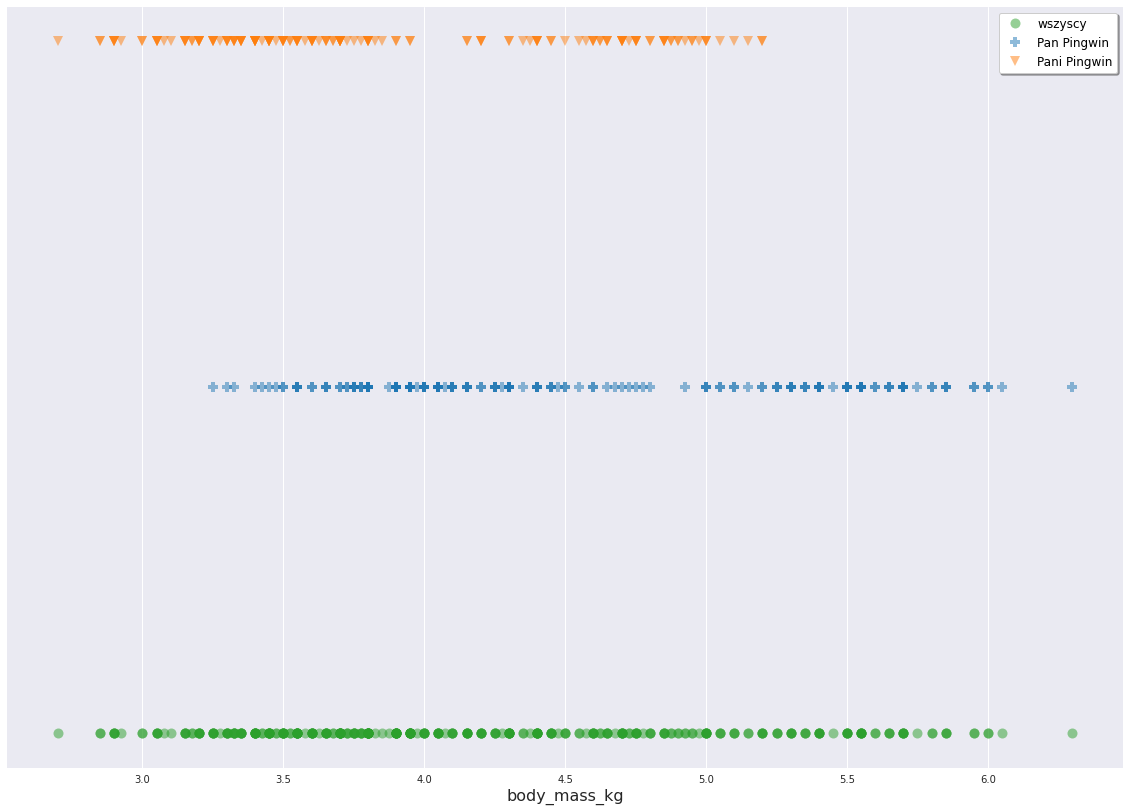

In [34]:
ax_x = np.linspace(X.min(), X.max(), num=300)

with plt.style.context('seaborn'):  
    plt.figure(figsize=(20,14))
    plt.plot(X, np.zeros_like(X), 'o', 
             markersize=10, alpha=0.5, markerfacecolor='tab:green', markeredgecolor='tab:green', 
             label='wszyscy')

    plt.plot(X_male, np.ones_like(X_male), 'P', 
             markersize=10, alpha=0.5, markerfacecolor='tab:blue', markeredgecolor='tab:blue', 
             label='Pan Pingwin')

    plt.plot(X_Female, 2*np.ones_like(X_Female), 'v', 
             markersize=10, alpha=0.5, markerfacecolor='tab:orange', markeredgecolor='tab:orange', 
             label='Pani Pingwin')

    plt.xlabel(feature, fontsize=16)
    plt.yticks([])
plt.legend(shadow=True, fontsize=12)
plt.show()

Jak widać na wykresach nasze odrzucenie hipotezy zerowej okazało się słuszne, ponieważ rozkład 
nie przypomina rozkładu normalnego przez już widoczne dwie grupu dla Pan Pingwinow od 3 do 4 i Panow Pingwinow od 3 do prawie 5 a drufa ponad 5 do ponad 6

### Estymator Parzena

Funkcja jądra

In [35]:
def K(x):
  return np.exp(-x**2/2)/np.sqrt(2*np.pi)

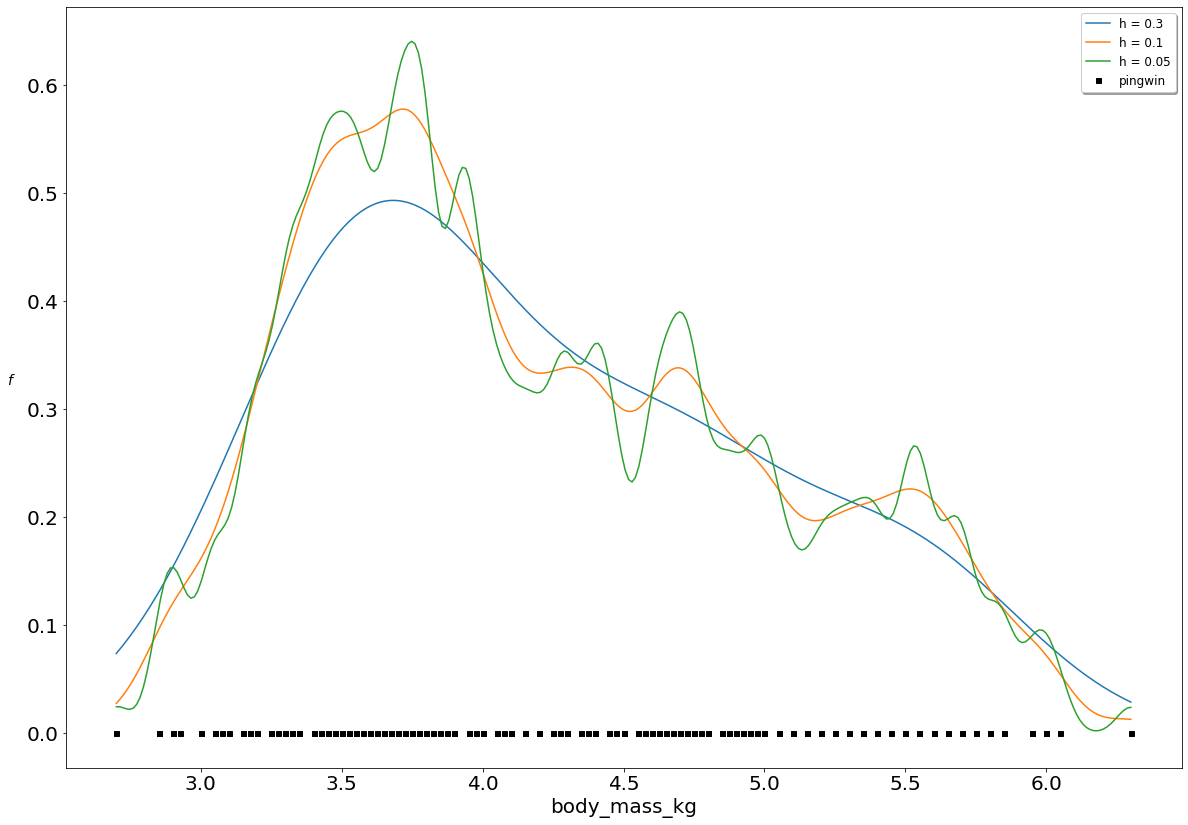

In [36]:
H = [0.3, 0.1, 0.05]
N = X.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X):
    suma += K((ax_x-pomiar)/h)

  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X, np.zeros_like(X) , 's', markersize=5, color='black', label='pingwin')

plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body_mass_kg", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### h nalezy do [0.3, 0.1, 0.05] dla meskiego gatunku

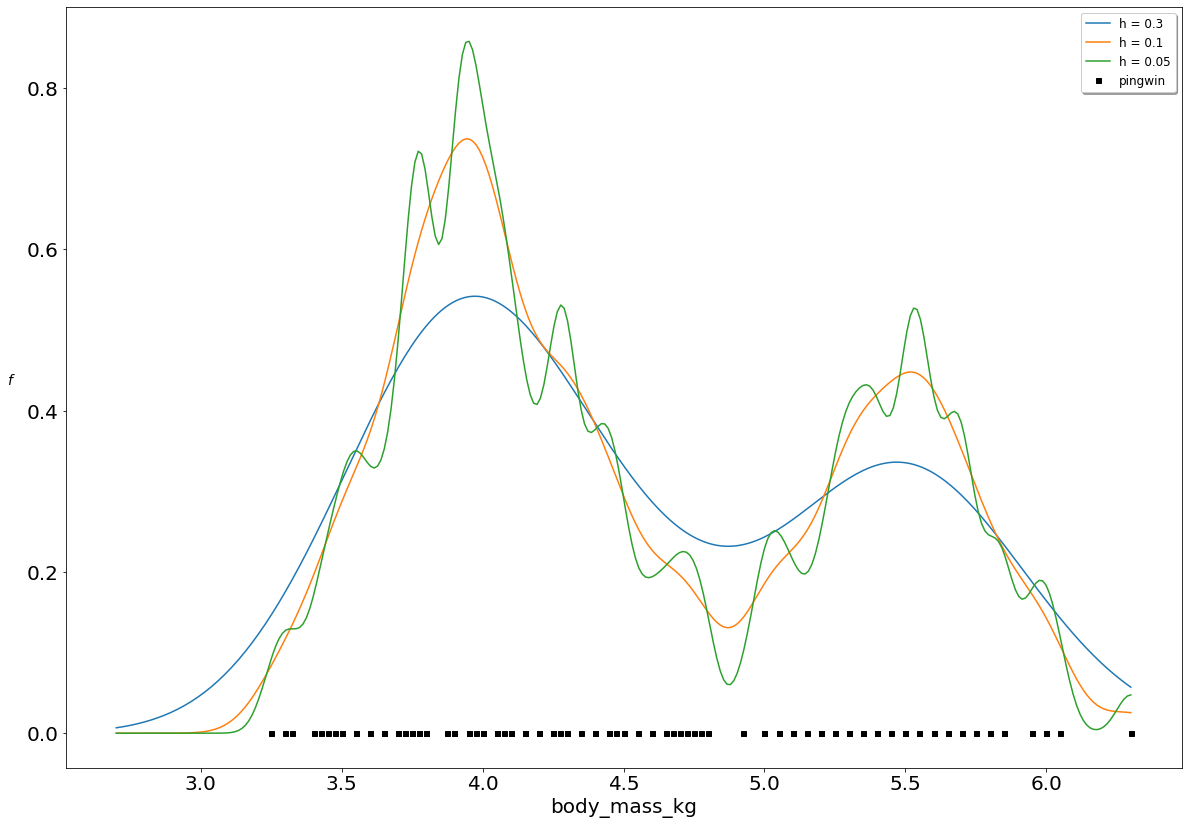

In [37]:
H = [0.3, 0.1, 0.05]
N = X_male.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X_male):
    suma += K((ax_x-pomiar)/h)
    
  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X_male, np.zeros_like(X_male) , 's', markersize=5, color='black', label='pingwin')

plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body_mass_kg", fontsize=20)
plt.yticks(fontsize=20)

plt.show()

### h nalezy do [0.3, 0.1, 0.05] dla zenskiego gatunku

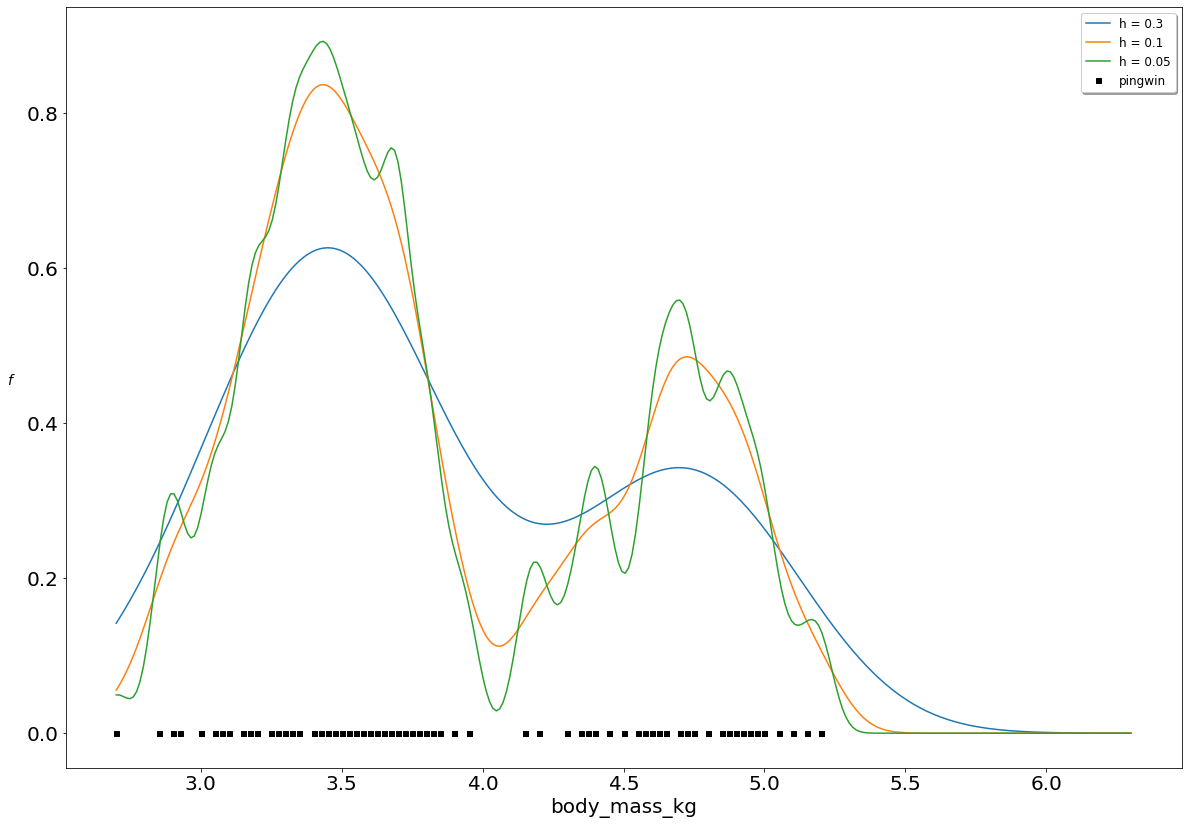

In [38]:
H = [0.3, 0.1, 0.05]
N = X_Female.size

plt.figure(figsize=(20,14))
for h in H:
  suma = 0
  for nr, pomiar in enumerate(X_Female):
    suma += K((ax_x-pomiar)/h)

  os_y = suma/(h*N)
  plt.plot(ax_x, os_y, label=f'h = {h}')
  

plt.plot(X_Female, np.zeros_like(X_Female) , 's', markersize=5, color='black', label='pingwin')

plt.ylabel('$f$', fontsize=14, rotation='horizontal', labelpad=15)
plt.legend(fontsize=12, shadow=True)
plt.legend(fontsize=12, shadow=True)
plt.xticks(fontsize=20)
plt.xlabel("body_mass_kg", fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### ogolne spojrzenie na zaleznosci miedzy cechami

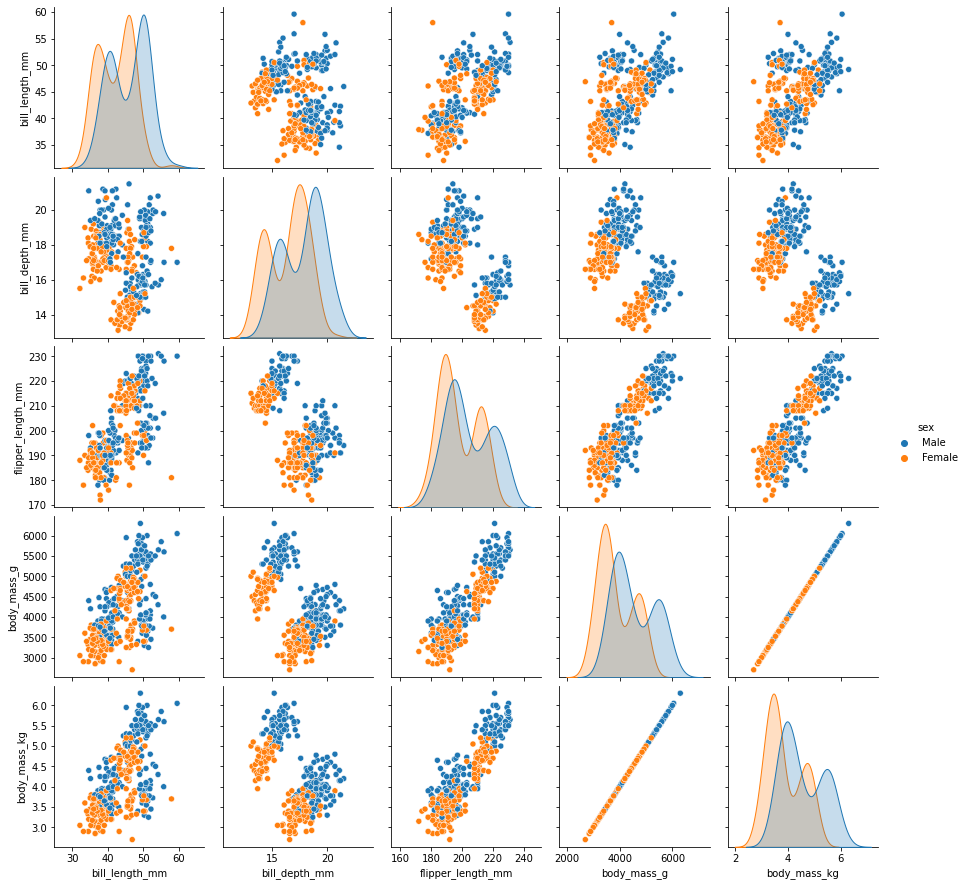

In [39]:
import seaborn as sns
sns.pairplot(all_of_data, hue='sex', height=2.5);